<a href="https://colab.research.google.com/github/srinivasdasu24/__DataScience/blob/main/CrossSell_Prediction/InClass_Working_Code_3_Numerical_%26_Categorical_EDA_Outlier_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code 3
- Numerical & Categorical EDA
  - Outlier Detection and Basic Imputation (Mean/Median/Mode)
- Logistic Model (Balanced/ Unbalanced)

## 1/ Import Libraries

In [ ]:
#CodeSection1
from google.colab import drive
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [ ]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [ ]:
#CodeSection3
train = pd.read_csv('/mntDrive/MyDrive/__DataScience/2 Cross Sell Prediction/input/train.csv')
test = pd.read_csv('/mntDrive/MyDrive/__DataScience/2 Cross Sell Prediction/input/test.csv')

## 3/ Combine both Datasets (train, test)

In [ ]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [ ]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [ ]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## 4/ EDA - Check Numerical Variables

In [ ]:
#CodeSection7
# Lets Import the Seaborn Library
import seaborn as sns

### Lets start with Numerical Variable/Feature - 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


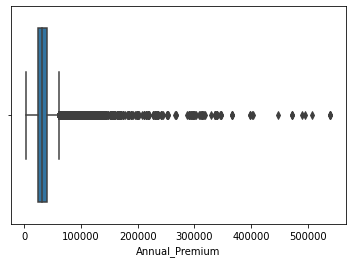

In [ ]:
#CodeSection8
# in this case we start with "ApplicantIncome"
sns.boxplot(train['Annual_Premium'])
# Has Outliers

### Inter Quantile Range Strategy 
- Outlier Detection
- Outlier Treatment

In [ ]:
#CodeSection9
# Use quantile function
# Find Q1 and Q3
Q1 = train['Annual_Premium'].quantile(0.25)
Q3 = train['Annual_Premium'].quantile(0.75)

#Find IQR 
IQR = Q3 - Q1

#Find Lower Limit and Higher Limit
Lower_Whisker = Q1 - 1.5 * Q3
Upper_Whisker = Q1 + 1.5 * Q3

# Print all Values
print('Q1 : {}'.format(Q1))
print('Q3 : {}'.format(Q3))
print('IQR : {}'.format(IQR))
print(Lower_Whisker, Upper_Whisker)

Q1 : 24405.0
Q3 : 39400.0
IQR : 14995.0
-34695.0 83505.0


### Now lets Treat the value by imputing with Mean/Median

In [ ]:
#CodeSection10
# Replace Variable with Upper Whisker (there are other strategies)
for data in all_data:
  data['Annual_Premium'] = data['Annual_Premium'].apply(lambda x: Upper_Whisker if x > Upper_Whisker else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


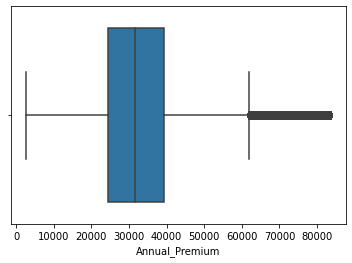

In [ ]:
#CodeSection11
# Lets check again
sns.boxplot(train['Annual_Premium'])
# Now No Outliers

### Replicate for other Numerical Variable/Features

In [ ]:
#CodeSection12

# Identify all Numerical Variables 
numerical_features = ['Age','Vintage']

# Write a loop to do the same 
for num_feat in numerical_features:
  Q1 = train[num_feat].quantile(0.25)
  Q3 = train[num_feat].quantile(0.75)

  #Find IQR 
  IQR = Q3-Q1

  #Find Lower Limit and Higher Limit
  Lower_Whisker = Q1 - 1.5 * IQR
  Upper_Whisker = Q3 + 1.5 * IQR

  for data in all_data:
    data[num_feat] = data[num_feat].apply(lambda x: Upper_Whisker if x > Upper_Whisker else x)

## 5/ Impute Numerical Variables

### Impute all Numerical Variables at once



In [ ]:
#CodeSection13
# Write a loop to Impute all Numerical Vairbales
# for dataset in all_data:
#   # Numerical Feature 1
#   dataset['ApplicantIncome'] = dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].median())
  
#   # Numerical Feature 2
#   dataset['CoapplicantIncome'] = dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].median())

#   # Numerical Feature 3
#   dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
  
#   # Numerical Feature 4
#   dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median())

#   # Numerical Feature 5
#   dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].median())

## 6/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Impute all Categorical Variables at once

In [ ]:
#CodeSection14
# for dataset in all_data:
#   # Categorical Feature 1
#   dataset['Gender'] = dataset['Gender'].fillna('Missing')

#   # Categorical Feature 2
#   dataset['Married'] = dataset['Married'].fillna('Missing')
  
#   # Categorical Feature 3
#   dataset['Dependents'] = dataset['Dependents'].fillna('Missing')

#   # Categorical Feature 4
#   dataset['Self_Employed'] = dataset['Self_Employed'].fillna('Missing')

## 7/ Now Re Check all Features

In [ ]:
#CodeSection15
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

## 8/ Prepare Data for Model Model

In [ ]:
#CodeSection16
# Check First 5 Rows of Test Data
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
#CodeSection17
# Get X and y Variables for your Dataset
X = train.drop(['id','Response'], axis =1)
Y = train['Response']

### Create Dummy Variables for  Categorical Variables

In [ ]:
#CodeSection18
# Get Dummy Variables
X = pd.get_dummies(X)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [ ]:
#CodeSection19
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000)

In [ ]:
#CodeSection20
# Fit Model
model = clf.fit(X, Y)

### Check Accuracy of Model on Train Data

In [ ]:
#CodeSection21
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [ ]:
#CodeSection22
# Import metrics library
from sklearn.metrics import accuracy_score

In [ ]:
#CodeSection23
# get Actual "y" variables (use "y_true" as variable)
y_true = train['Response']

In [ ]:
#CodeSection24
# Print Train Accuracy
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 87.6%


## 10/ Predict and Submit

### Predict

In [ ]:
#CodeSection25
# Get all the X Variables from the Test Dataset
X_test = test.drop(['id'], axis =  1)

In [ ]:
#CodeSection26
#Covert to Dummies
X_test = pd.get_dummies(X_test)

In [ ]:
#CodeSection27
# use this code if the next Code shows error
#X_test['Married_Missing']  = 0

In [ ]:
#CodeSection28
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Import Sample Submission

In [ ]:
#CodeSection29
sample_submission = pd.read_csv("/mntDrive/MyDrive/__DataScience/2 Cross Sell Prediction/input/sample_submission.csv")
sample_submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


### Create Submission File

In [ ]:
#CodeSection30
submission = pd.DataFrame({
    'id' : test['id'],
    'Response' : X_test_prep
})

### Export Submission File

In [ ]:
#CodeSection31
submission.to_csv("/mntDrive/MyDrive/__DataScience/2 Cross Sell Prediction/output/O3_LR_Outlier.csv", index = False)

In [ ]:
# LB Accuracy : 0.502